<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/Practical_Distributions_HTests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Guia Prático de Distribuições e Teste de Hipóteses**

---

## [NetFlix, What is an A/B Test?](https://netflixtechblog.com/what-is-an-a-b-test-b08cc1b57962)

## [Outros Exemplos](https://www.datacamp.com/blog/data-demystified-what-is-a-b-testing)

[SciPy](https://docs.scipy.org/doc/scipy/tutorial/)

In [37]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 3)

# Gerando dados de uma distribuição Normal



## `rvs(loc=0, scale=1, size=1, random_state=None)`

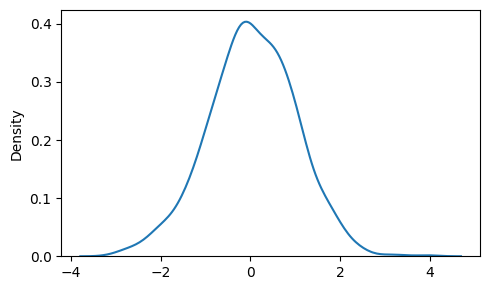

In [38]:
from scipy.stats import norm
values = norm.rvs(loc=0,scale=1,size=1000,random_state=1)

fig, ax = plt.subplots(1,1)

sns.kdeplot(x=values,ax=ax)

plt.tight_layout()
plt.show()

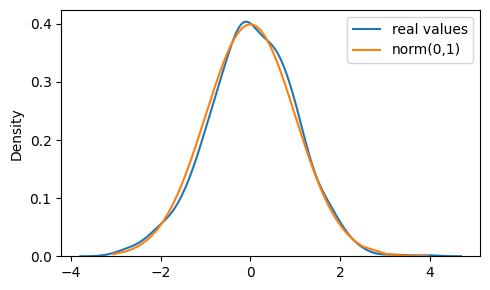

In [39]:
values = norm.rvs(loc=0,scale=1,size=1000,random_state=1)

fig, ax = plt.subplots(1,1)

sns.kdeplot(x=values,ax=ax,label='real values')

values_norm = []
for v in values:
    values_norm.append(norm.pdf(v,loc=0,scale=1))

values_norm = np.array(values_norm)

sns.lineplot(x=values, y=values_norm, ax=ax, label='norm(0,1)')

plt.legend()
plt.tight_layout()
plt.show()

## Diferentes médias e dispersão dos dados

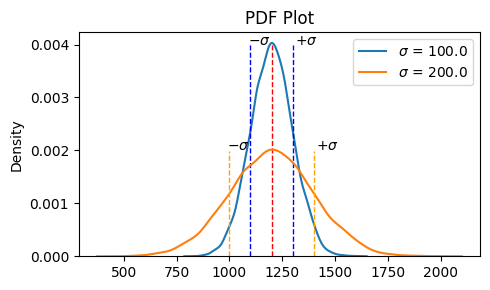

In [40]:
fig, ax = plt.subplots(1,1)

values = norm.rvs(loc=1200,scale=100,size=10000,random_state=1)
sns.kdeplot(values,ax=ax,label='$\\sigma$ = ' + str(np.round(values.std(),0)))
ax.vlines(1200-values.std(),0,norm.pdf(1200,loc=1200,scale=100),linestyle='--',color='b',lw=1)
ax.vlines(1200+values.std(),0,norm.pdf(1200,loc=1200,scale=100),linestyle='--',color='b',lw=1)
ax.vlines(1200,0,norm.pdf(1200,loc=1200,scale=100),linestyle='--',color='r',lw=1)

values2 = norm.rvs(loc=1200,scale=200,size=10000,random_state=1)
sns.kdeplot(values2,ax=ax,label='$\\sigma$ = ' + str(np.round(values2.std(),0)))
ax.vlines(1200-values2.std(),0,norm.pdf(1200,loc=1200,scale=200),linestyle='--',color='orange',lw=1)
ax.vlines(1200+values2.std(),0,norm.pdf(1200,loc=1200,scale=200),linestyle='--',color='orange',lw=1)

ax.text(1200+values2.std()+10,0.002,'$+\\sigma$')
ax.text(1200-values2.std()-10,0.002,'$-\\sigma$')

ax.text(1200+values.std()+10,0.004,'$+\\sigma$')
ax.text(1200-values.std()-10,0.004,'$-\\sigma$')

ax.set_title('PDF Plot')

plt.legend()
plt.tight_layout()
plt.show()

# PDF, CDF e PPF

* PDF, probability distribution function
* CDF, cummulative distribution function
* PPF, percent point function



[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]


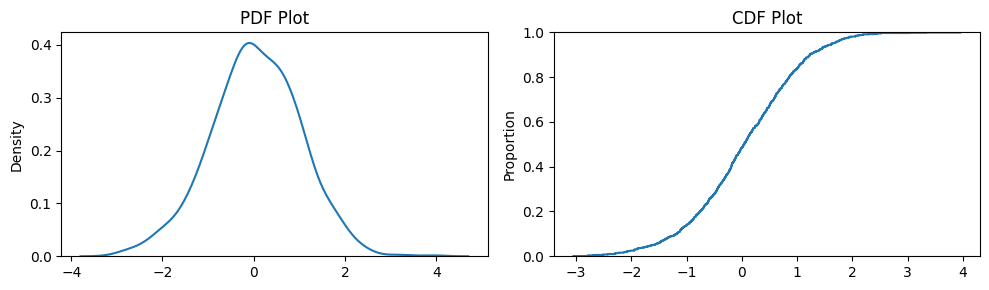

In [41]:
from scipy.stats import norm

values = norm.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]


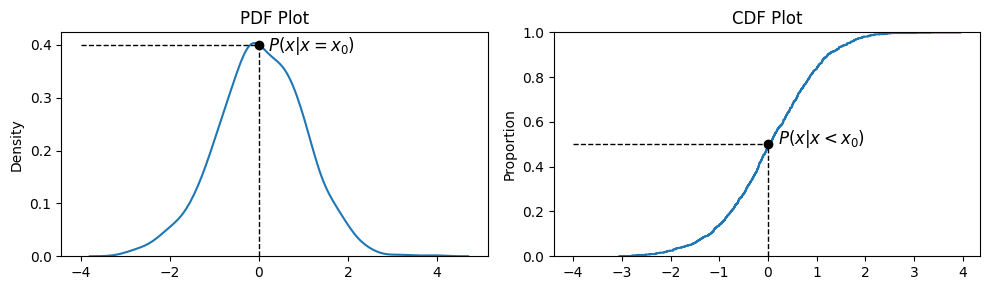

In [42]:


from scipy.stats import norm

values = norm.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].vlines(0,0,norm.pdf(0),linestyle='--',color='k',lw=1)
ax[0].hlines(norm.pdf(0),-4,0,linestyle='--',color='k',lw=1)
ax[0].plot(0,norm.pdf(0),'ko')

ax[0].text(0+0.2,norm.pdf(0)-.01,'$P(x | x = x_0)$',fontsize=12)

ax[0].set_title('PDF Plot')

sns.ecdfplot(values,ax=ax[1])
ax[1].vlines(0,0,norm.cdf(0),linestyle='--',color='k',lw=1)
ax[1].hlines(norm.cdf(0),-4,0,linestyle='--',color='k',lw=1)
ax[1].plot(0,norm.cdf(0),'ko')

ax[1].text(0+0.2,norm.cdf(0),'$P(x | x < x_0)$',fontsize=12)

ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## `pdf(x, loc=0, scale=1)`, $P(x=x_0)$

Obtém a *probabilidade* para um ponto específico. De fato, pouca aplicabilidade prática já que um ponto em uma probabilidade de valores contínuos tem probabilidade 0. 

In [43]:
norm.pdf(0) # probability distribution function

0.3989422804014327

## `cdf(x, loc=0, scale=1)`, $P(x | x\le x_0)$


In [44]:
norm.cdf(0) # cummulative distribution function

0.5

## `ppf(x, loc=0, scale=1)`, $x_0 | P(x|x\le x_0) = p$

É o inverso da `cdf`.

In [45]:
norm.ppf(0.5) # percent point function

0.0

# Exemplo

Uma fábrica produz HDs SSD com uma vida útil de 5 anos. Sabe-se que o desvio padrão da durabilidade desses HDs é de 5 meses. 




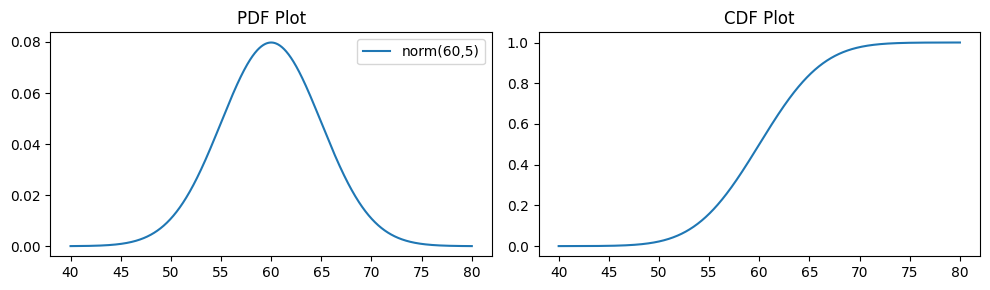

In [46]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

mu = 5*12
sigma = 5
values_norm = []
points = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)

for v in points:
    values_norm.append(norm.pdf(v,loc=mu,scale=sigma))

values_norm = np.array(values_norm)

sns.lineplot(x=points, y=values_norm, ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')
ax[0].set_title('PDF Plot')
ax[0].legend()

values_cdf = []

for v in points:
    values_cdf.append(norm.cdf(v,loc=mu,scale=sigma))

values_cdf = np.array(values_cdf)

sns.lineplot(x=points, y=values_cdf,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

Estime o número de HDs que precisarão ser trocados após 48 meses.

In [47]:
norm.cdf(48,loc=mu,scale=sigma) * 1000

8.197535924596131

Você faz uma reserva técnicas comprando 10% de HDs para trocas. Essa reserva deve garantir quantos meses de trocas? 

In [48]:
norm.ppf(0.10,loc=mu,scale=sigma)  

53.592242172277

# Exemplo

Você compra mil sacas de café de 60Kg. O fornecedor garante um desvio padrão de 200g por saca. Qual a chance de você obter em 100 sacas uma saca com menos de 59.5Kg? 




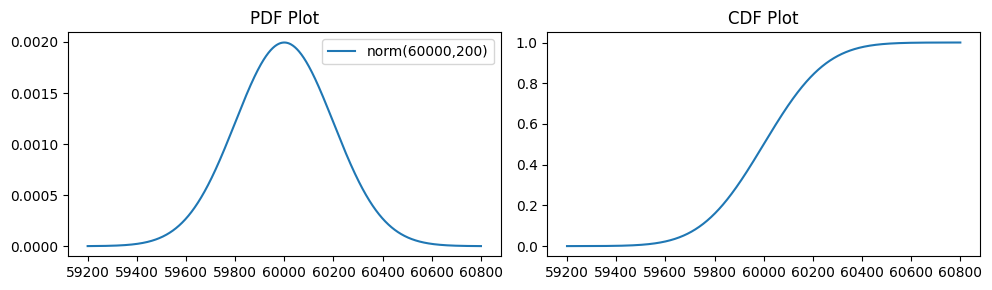

In [49]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

mu = 60000    # Evite mu = 60, sigma = 0.2 para o PDF
sigma = 200
values_norm = []
points = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)

for v in points:
    values_norm.append(norm.pdf(v,loc=mu,scale=sigma))

values_norm = np.array(values_norm) 

sns.lineplot(x=points, y=values_norm, ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')
ax[0].set_title('PDF Plot')
ax[0].legend()

values_cdf = []

for v in points:
    values_cdf.append(norm.cdf(v,loc=mu,scale=sigma))

values_cdf = np.array(values_cdf)

sns.lineplot(x=points, y=values_cdf,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

Qual a probabilidade de você obter sacas com peso abaixo ou acima de 2 e 3 vezes o desvio padrão? 

In [50]:
2 * norm.cdf(60000 - 2*200, loc=60000, scale=200)

0.04550026389635839

In [51]:
2 * norm.cdf(60000 - 3*200, loc=60000, scale=200)

0.0026997960632601866

Você encontrou em uma amostra das 100 sacas adquiridas 2 sacas pouco abaixo de 59.6 Kg. Você pode considerar que a informação do fornecedor é confiável? **Ainda, sim.**

In [52]:
norm.ppf(0.02,loc=60000,scale=200)

59589.25021787363

Sendo verdadeira a informação do fornecedor, qual o intervalo de peso que você deve encontrar em 95% das amostras?

In [53]:
norm.ppf(1 - 0.025,loc=60000,scale=200)

60391.99279690801

In [54]:
norm.ppf(0.025,loc=60000,scale=200)

59608.00720309199

# Intervalo de Confiança, `interval(confidence, loc=0, scale=1)`

In [55]:
norm.interval(0.95, loc=60000, scale=200)

(59608.00720309199, 60391.99279690801)

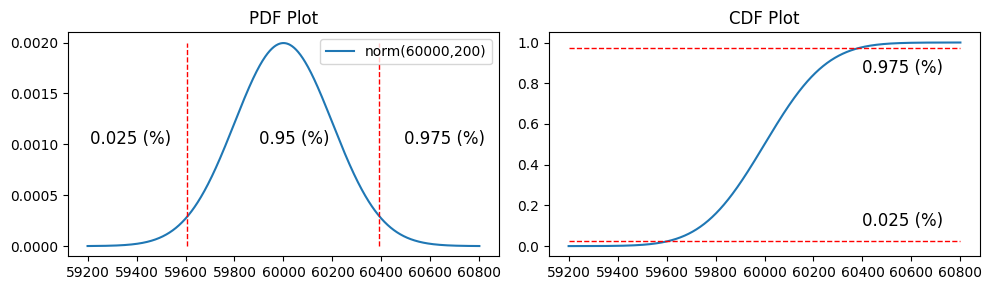

In [56]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

mu = 60000
sigma = 200
values_norm = []
points = np.linspace(mu - 4*sigma, mu + 4*sigma,1000)

for v in points:
    values_norm.append(norm.pdf(v,loc=mu,scale=sigma))

values_norm = np.array(values_norm)

sns.lineplot(x=points, y=values_norm, ax=ax[0], label='norm(' + str(mu) + ',' + str(sigma) + ')')

ax[0].vlines(norm.interval(0.95, loc=60000, scale=200)[0],0,0.002,color='r',linestyle='--',lw=1)
ax[0].vlines(norm.interval(0.95, loc=60000, scale=200)[1],0,0.002,color='r',linestyle='--',lw=1)

ax[0].set_title('PDF Plot')
ax[0].text(60000-100,0.001,'0.95 (%)',fontsize=12)

ax[0].text(norm.interval(0.95, loc=60000, scale=200)[0]-400,0.001,'0.025 (%)',fontsize=12)
ax[0].text(norm.interval(0.95, loc=60000, scale=200)[1]+100,0.001,'0.975 (%)',fontsize=12)

ax[0].legend()

values_cdf = []

for v in points:
    values_cdf.append(norm.cdf(v,loc=mu,scale=sigma))

values_cdf = np.array(values_cdf)

sns.lineplot(x=points, y=values_cdf,ax=ax[1])
ax[1].hlines(0.975, 60000-4*200,60000+4*200,color='r',linestyle='--',lw=1)
ax[1].hlines(0.025,60000-4*200,60000+4*200,color='r',linestyle='--',lw=1)

ax[1].text(60400,0.1,'0.025 (%)',fontsize=12)
ax[1].text(60400,0.85,'0.975 (%)',fontsize=12)

ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

# Minha distribuição é normal? qqplot, `stats.probplot()`

Apesar de haverem testes sobre normalidade a inspeção visual é frequentemente empregada com o uso de gráficos qqplot.

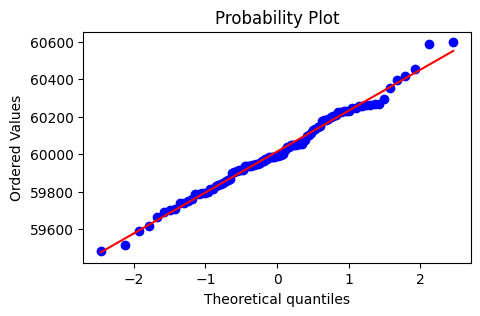

In [57]:
from scipy.stats import probplot

fig, ax = plt.subplots(1,1)

values = norm.rvs(loc=60000, scale=200, size=100)
stats.probplot(values, dist='norm', fit=True, plot=ax)
plt.show()

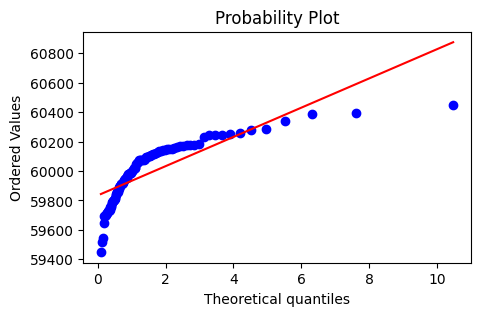

In [58]:
from scipy.stats import probplot
from scipy.stats import lognorm

fig, ax = plt.subplots(1,1)

values = norm.rvs(loc=60000, scale=200, size=100)
stats.probplot(values, dist=stats.lognorm(0.954), fit=True, plot=ax)
plt.show()

# Outras distribuições 


[SciPy Stats](https://docs.scipy.org/doc/scipy/tutorial/stats.html)



## Lognorm

[4.70970596 0.55787764 0.60418439 0.3592948  2.28324774 0.11128421
 5.28329747 0.4837479  1.35576151 0.78828204]


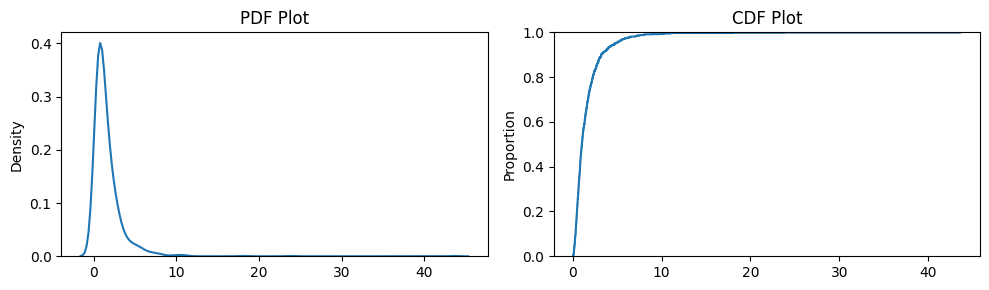

In [59]:
from scipy.stats import lognorm

rv = lognorm(0.954)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## gamma

[4.75021203 0.98742605 1.06559722 0.62384076 5.07008018 0.85735877
 4.34109604 0.16815469 3.58637333 0.60594455]


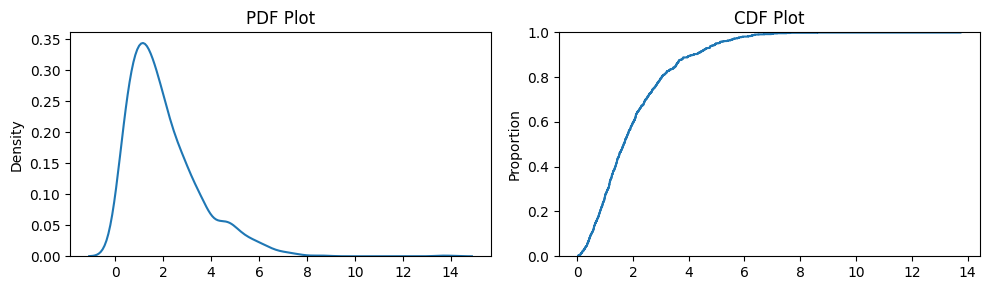

In [60]:
from scipy.stats import gamma

rv = gamma(1.99)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## expon

[1.03960584 1.77412525 0.50011438 0.86001275 0.6587096  0.59688387
 0.70611463 0.92397648 1.00545254 1.27395977]


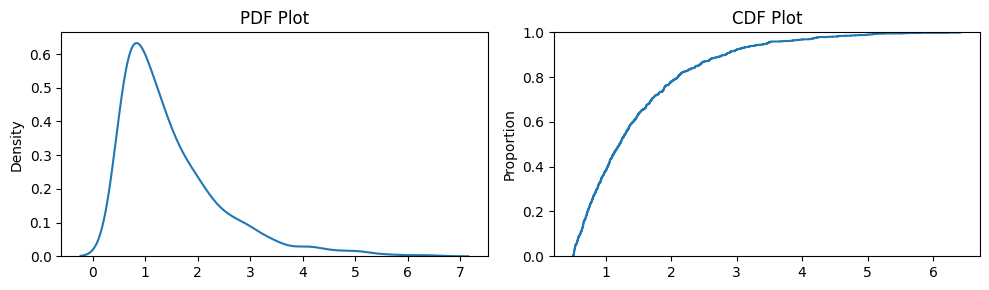

In [61]:
from scipy.stats import expon 

rv = expon(1/2)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

## t-student

Uma distribuição importante usada quando esperamos uma distribuição normal, mas não temos a população, apenas uma amostra dos dados.

[ 2.61103204 -1.17044637 -1.16204805 -1.69123532  0.41674013 -0.49759053
 -0.45341236  0.70598317 -0.32951745  1.88563226]


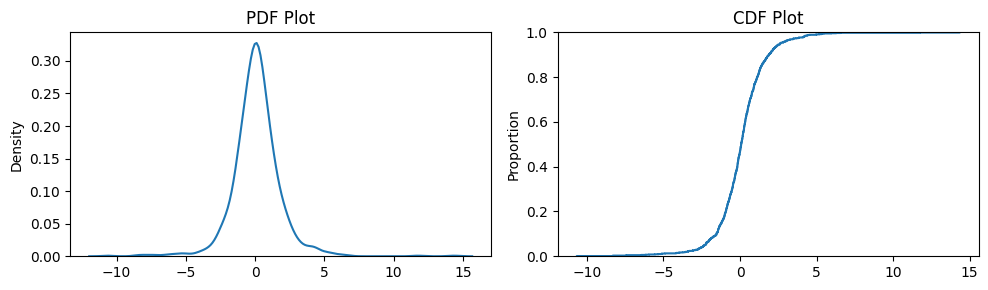

In [62]:
from scipy.stats import t 

rv = t(2.74)
values = rv.rvs(size=1000, random_state=1)
print(values[0:10])

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

Para todas valem as funções,

## `rv.rvs()`
## `rv.pdf()`  
## `rv.cdf()`
## `rv.ppf()`

Embora, cada uma, tenha os seus parâmetros específicos. Para distribuições discretas, troque `pdf` por `pmf`, e assim por diante.

# Teste de Hipóteses


## `stats.ttest_1samp(x, mu)` 

Testa uma média hipotética ou teórica.

## Exemplo

3 empresas fazem um anúncio afirmando remunerar cientistas de dados 10% acima do mercado, cuja média é R$ 8735 a.m. Você obtêm amostra de salários de 30 cientistas de dados das empresas. Você consegue afirmar que o anúncio de quais empresas é justo? 

$$H_0: \mu = 9608 $$
$$H_1: \mu \ne 9608 $$


In [63]:
8735*1.1

9608.5

In [64]:
#@markdown
values1 = norm.rvs(loc=9580,size=30,scale=50,random_state=123)
values2 = norm.rvs(loc=9580,size=30,scale=100,random_state=123)
values3 = norm.rvs(loc=9580,size=30,scale=200,random_state=123)


In [65]:
values1.mean()

9582.235698548093

In [66]:
values2.mean()

9584.471397096186

In [67]:
values3.mean()

9588.942794192373

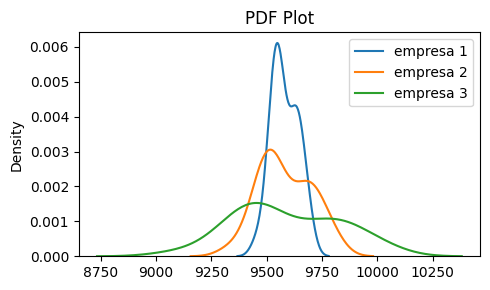

In [68]:
fig, ax = plt.subplots()

sns.kdeplot(values1,ax=ax,label='empresa 1')
sns.kdeplot(values2,ax=ax,label='empresa 2')
sns.kdeplot(values3,ax=ax,label='empresa 3')
ax.set_title('PDF Plot')

plt.legend()
plt.tight_layout()
plt.show()

## Trick: Validando o teste

In [69]:
stat, p = stats.ttest_1samp(values3, values3.mean())  

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 1.0


In [70]:
stat, p = stats.ttest_1samp(values3, values3.mean() - 4*values3.std())  

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Rejeita H0 2.1766142008525573e-19


## Testando

In [71]:
stat, p = stats.ttest_1samp(values1, 9608)  

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Rejeita H0 0.024252947874818437


In [72]:
stat, p = stats.ttest_1samp(values2, 9608)  

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.28663859783620127


In [73]:
stat, p = stats.ttest_1samp(values3, 9608)  

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.6634796139956985


Somente a empresa 1 não parece poder afirmar ter uma média de salário 10% acima do mercado.

## `stats.ttest_ind(x1, x2)` 

Testa a média de duas populações.

## Exemplo

Uma quarta empresa apresentou um salário médio para os cientistas de dados de R$ 9777 a.m. O salário médio dessa empresa é significativamente diferente do salário médio dos demais que justifique você buscar uma colocação nessa empresa e não nas demais? 

$$H_0:  \mu_0 = \mu_1 $$
$$H_1: \mu_0 \ne \mu_1 $$


In [74]:
#@markdown
values4 = norm.rvs(loc=9720,size=20,scale=500,random_state=123)


In [75]:
values4.mean()

9777.208865977645

## Trick: Validando o teste

In [76]:
stat, p = stats.ttest_ind(values4, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 1.0


## Testando

In [77]:
stat, p = stats.ttest_ind(values1, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.09637289780091156


In [78]:
stat, p = stats.ttest_ind(values2, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.10676604710200716


In [79]:
stat, p = stats.ttest_ind(values3, values4)

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)

Aceita H0 0.14169685317827294


Nenhuma das empresas têm uma diferença significativa do salário médio com a empresa 4.

## `stats.ttest_rel(x1, x2)`  
Testes pareados, o mesmo que,

`stats.ttest_1samp(x1 - x2, 0)`  


# Exemplo

Homens tem QI superior ao das mulheres? 

In [80]:
df = pd.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv',sep=';',na_values=".",index_col=0)
df = df.drop(columns='MRI_Count')
df = df.dropna() 
df.head()

Gender  FSIQ  VIQ  PIQ  Weight  Height
1  Female   133  132  124   118.0    64.5
3    Male   139  123  150   143.0    73.3
4    Male   133  129  128   172.0    68.8
5  Female   137  132  134   147.0    65.0
6  Female    99   90  110   146.0    69.0

In [81]:
df.groupby('Gender').mean() 

FSIQ         VIQ         PIQ      Weight     Height
Gender                                                           
Female  111.900000  109.450000  110.450000  137.200000  65.765000
Male    115.388889  115.111111  112.333333  166.444444  71.372222

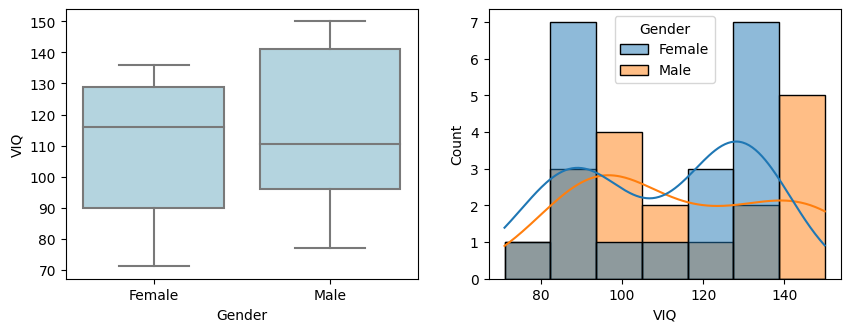

In [82]:
fig, ax = plt.subplots(1,2,figsize=(10,3.5))

col = 'VIQ'
sns.boxplot(data=df,x='Gender',y=col,color='lightblue',ax=ax[0])
sns.histplot(data=df,x=col,hue='Gender',kde=True,ax=ax[1])

plt.show()

In [83]:
stat, p = stats.ttest_ind(df[df.Gender == 'Female']['VIQ'], df[df.Gender == 'Male']['VIQ'])

if (p < 0.05):
  print("Rejeita H0",p)
else:
  print("Aceita H0",p)


Aceita H0 0.4550660394858371


# Avançado: Obtendo um CDF a partir de uma PDF arbitrária

From: Jee Vang, **Data Science Topics** (2023). [Acess](https://datascience.oneoffcoder.com/index.html)

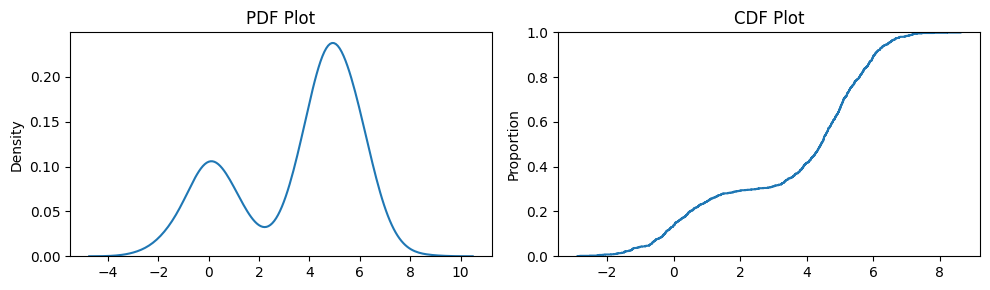

In [84]:
X = np.concatenate((norm.rvs(0,1,300), np.array(norm.rvs(5,1,700))))

values = pd.Series(X)

fig, ax = plt.subplots(1,2,figsize=(10,3))

sns.kdeplot(values,ax=ax[0])
ax[0].set_title('PDF Plot')
sns.ecdfplot(values,ax=ax[1])
ax[1].set_title('CDF Plot')

plt.tight_layout()
plt.show()

In [85]:
from sklearn.neighbors import KernelDensity
from scipy.misc import derivative
from scipy.integrate import quad

kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X[:, np.newaxis])
gmm_pdf = lambda x: np.exp(kde.score(np.array([x]).reshape(-1, 1)))

x = np.arange(-5, 10.1, 0.1)
y_cdf = np.array([tup[0] for tup in [quad(gmm_pdf, a, b) for a, b in [(a, b) for a, b in zip(x, x[1:len(x)])]]] + [0]).cumsum()


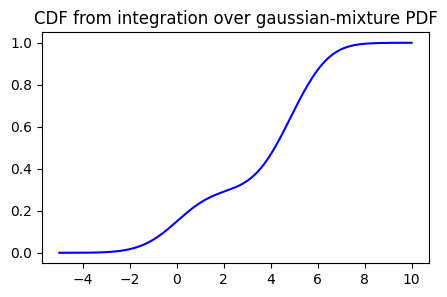

In [86]:
fig, ax = plt.subplots()

ax.plot(x, y_cdf, color='b')
ax.set_title('CDF from integration over gaussian-mixture PDF')

plt.show()

In [87]:
cdf = pd.DataFrame()
cdf['value'] = x
cdf['prob'] = y_cdf

cdf.head()

value      prob
0   -5.0  0.000003
1   -4.9  0.000007
2   -4.8  0.000013
3   -4.7  0.000022
4   -4.6  0.000034

In [88]:
cdf[ (cdf.value >=2.9) & (cdf.value <= 3) ]

value      prob
80    3.0  0.342524

In [89]:
cdf[ (cdf.prob <= 0.36) ].tail()

value      prob
78    2.8  0.328491
79    2.9  0.335148
80    3.0  0.342524
81    3.1  0.350695
82    3.2  0.359734